**Image Classifier**

#Intructions

For this challenge, you will complete the code to classify images of dogs and cats. You will use TensorFlow 2.0 and Keras to create a convolutional neural network that correctly classifies images of cats and dogs at least 63% of the time. (Extra credit if you get it to 70% accuracy!)

Some of the code is given to you but some code you must fill in to complete this challenge. Read the instruction in each text cell so you will know what you have to do in each code cell.

The first code cell imports the required libraries. The second code cell downloads the data and sets key variables. The third cell is the first place you will write your own code.

The structure of the dataset files that are downloaded looks like this (You will notice that the test directory has no subdirectories and the images are not labeled):



```
cats_and_dogs

|__ train:
    |______ cats: [cat.0.jpg, cat.1.jpg ...]
    |______ dogs: [dog.0.jpg, dog.1.jpg ...]
 |__ validation:
    |______ cats: [cat.2000.jpg, cat.2001.jpg ...]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg ...]
 |__ test: [1.jpg, 2.jpg ...]

```


You can tweak epochs and batch size if you like, but it is not required.

The following instructions correspond to specific cell numbers, indicated with a comment at the top of the cell (such as # 3).

Cell 3
Now it is your turn! Set each of the variables in this cell correctly. (They should no longer equal None.)

Create image generators for each of the three image data sets (train, validation, test). Use ImageDataGenerator to read / decode the images and convert them into floating point tensors. Use the rescale argument (and no other arguments for now) to rescale the tensors from values between 0 and 255 to values between 0 and 1.

For the *_data_gen variables, use the flow_from_directory method. Pass in the batch size, directory, target size ((IMG_HEIGHT, IMG_WIDTH)), class mode, and anything else required. test_data_gen will be the trickiest one. For test_data_gen, make sure to pass in shuffle=False to the flow_from_directory method. This will make sure the final predictions stay in the order that our test expects. For test_data_gen it will also be helpful to observe the directory structure.

After you run the code, the output should look like this:


```
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 class.

```


Cell 4

The plotImages function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the train_data_gen variable correctly, then running this cell will plot five random training images.

Cell 5

Recreate the train_image_generator using ImageDataGenerator.

Since there are a small number of training examples, there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.

Add 4-6 random transformations as arguments to ImageDataGenerator. Make sure to rescale the same as before.

Cell 6

You don't have to do anything for this cell. train_data_gen is created just like before but with the new train_image_generator. Then, a single image is plotted five different times using different variations.

Cell 7

In this cell, create a model for the neural network that outputs class probabilities. It should use the Keras Sequential model. It will probably involve a stack of Conv2D and MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.

Compile the model passing the arguments to set the optimizer and loss. Also pass in metrics=['accuracy'] to view training and validation accuracy for each training epoch.

Cell 8

Use the fit method on your model to train the network. Make sure to pass in arguments for x, steps_per_epoch, epochs, validation_data, and validation_steps.

Cell 9

Run this cell to visualize the accuracy and loss of the model.

Cell 10

Now it is time to use your model to predict whether a brand new image is a cat or a dog.

In this cell, get the probability that each test image (from test_data_gen) is a dog or a cat. probabilities should be a list of integers.

Call the plotImages function and pass in the test images and the probabilities corresponding to each test image.

After you run the cell, you should see all 50 test images with a label showing the percentage of "sure" that the image is a cat or a dog. The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.

Cell 11

Run this final cell to see if you passed the challenge or if you need to keep trying.

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# 3
train_image_generator = ImageDataGenerator(
    rescale=1./255
)

validation_image_generator = ImageDataGenerator(
    rescale=1./255  # Only rescale for validation set (no augmentation)
)

test_image_generator = ImageDataGenerator(
    rescale=1./255  # Only rescale for test set (no augmentation)
)

# 2. Create the data generators for each dataset (train, validation, test)
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
)

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
)

test_data_gen = test_image_generator.flow_from_directory(
    PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    classes=['test'],
    class_mode= None,          # Binary classification (cats vs dogs)
    shuffle=False

)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


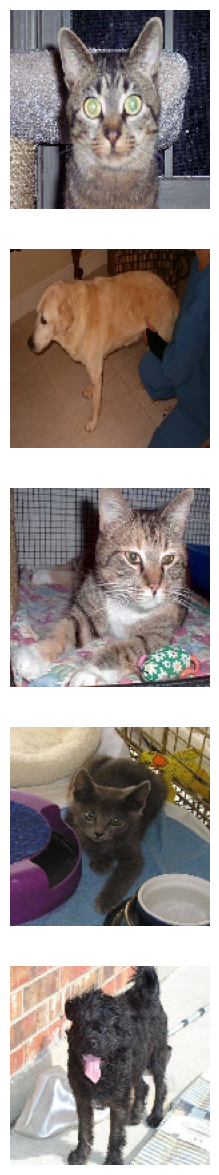

In [ ]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
# Initialize the ImageDataGenerator for the training set with data augmentation
train_image_generator = ImageDataGenerator(
    rescale=1./255,             # Normalize pixel values to the range [0, 1]
    rotation_range=30,          # Random rotations within 30 degrees
    width_shift_range=0.2,      # Random horizontal shift by 20% of the image width
    height_shift_range=0.2,     # Random vertical shift by 20% of the image height
    shear_range=0.2,            # Random shearing of the image
    zoom_range=0.2,             # Random zoom (zoom in and out by 20%)
    horizontal_flip=True,       # Random horizontal flip of images
    fill_mode='nearest'         # Strategy for filling in missing pixels after transformation
)



Found 2000 images belonging to 2 classes.


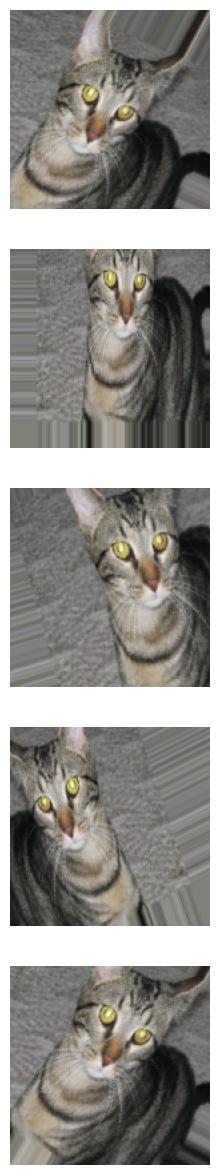

In [ ]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
# Create a Sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Output layer (binary classification: cat vs dog)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Print the summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          36,993 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,241 (508.75 KB)

 Trainable params: 130,241 (508.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 8
# Define an early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model using the training data generator and validate on the validation data generator
history = model.fit(
    train_data_gen,           # The generator for the training data
    steps_per_epoch= total_train // batch_size,  # Number of steps per epoch
    epochs=epochs,            # Number of epochs to train for
    validation_data=val_data_gen,  # The validation data generator
    validation_steps = total_val // batch_size,  # Number of validation steps
    callbacks = [early_stopping]   # Early stopping callback to prevent overfitting
)


Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4889 - loss: 0.7472 - val_accuracy: 0.5000 - val_loss: 0.6881
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - accuracy: 0.5547 - loss: 0.6852 - val_accuracy: 0.5000 - val_loss: 0.6892
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 618ms/step - accuracy: 0.5591 - loss: 0.6887 - val_accuracy: 0.5201 - val_loss: 0.6710
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5312 - loss: 0.6755 - val_accuracy: 0.4808 - val_loss: 0.7033
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 647ms/step - accuracy: 0.5670 - loss: 0.6720 - val_accuracy: 0.6049 - val_loss: 0.6505
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6016 - loss: 0.6721 - val_accuracy: 0.5192 - val_loss: 0.7308
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 557ms/step - accuracy: 0.5466 - loss: 0.6983 - val_accuracy: 0.5725 - val_loss: 0.6498
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4125 - loss: 0.6990 - val_accuracy: 0.5865

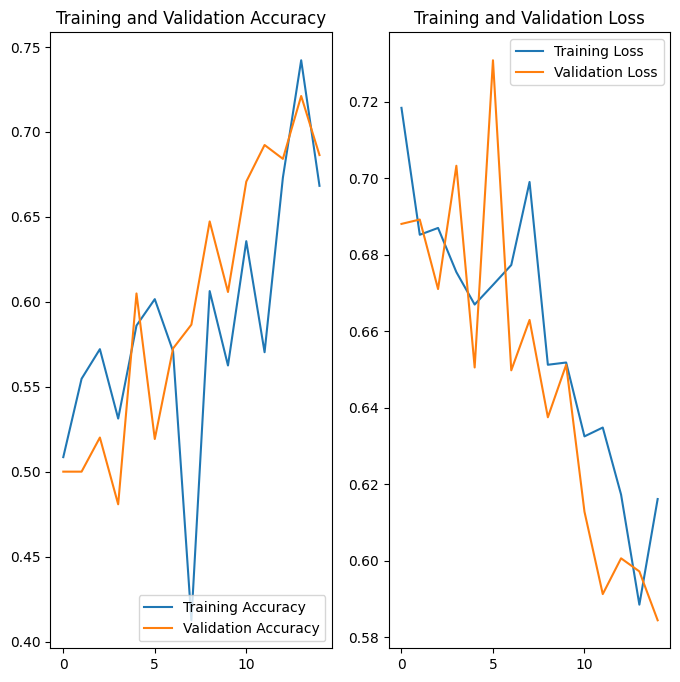

In [ ]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


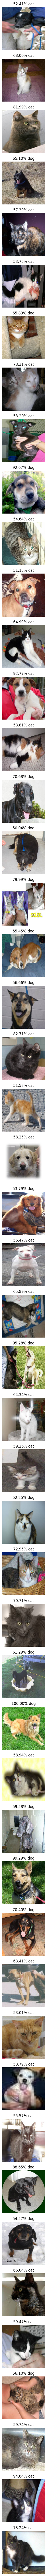

In [ ]:

test_images = next(test_data_gen)  # Get the next batch of test images from the test generator
predictions = model.predict(test_images)  # Get predictions for the batch of test images

# Step 2: Convert the predictions to probabilities (flatten to 1D)
probabilities = predictions.flatten().tolist()  # Flatten and convert to a list

# Step 3: Plot the test images with their corresponding probabilities
plotImages(test_images, probabilities)

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!
